In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy_indexed as npi

In [2]:
raw_data = np.genfromtxt("./Data/smallGrid/output_TrueOnlineSarsaAgent_smallGrid.csv", delimiter=",", names=True)
#raw_data = np.genfromtxt("test_file.csv", delimiter=",", names=True)

data = raw_data.view((float, len(raw_data.dtype.names)))

param_combos = np.vstack(tuple({tuple(e) for e in data[:,[3,4,5,6]]}))

plt.rcParams["figure.figsize"] = (20,20)

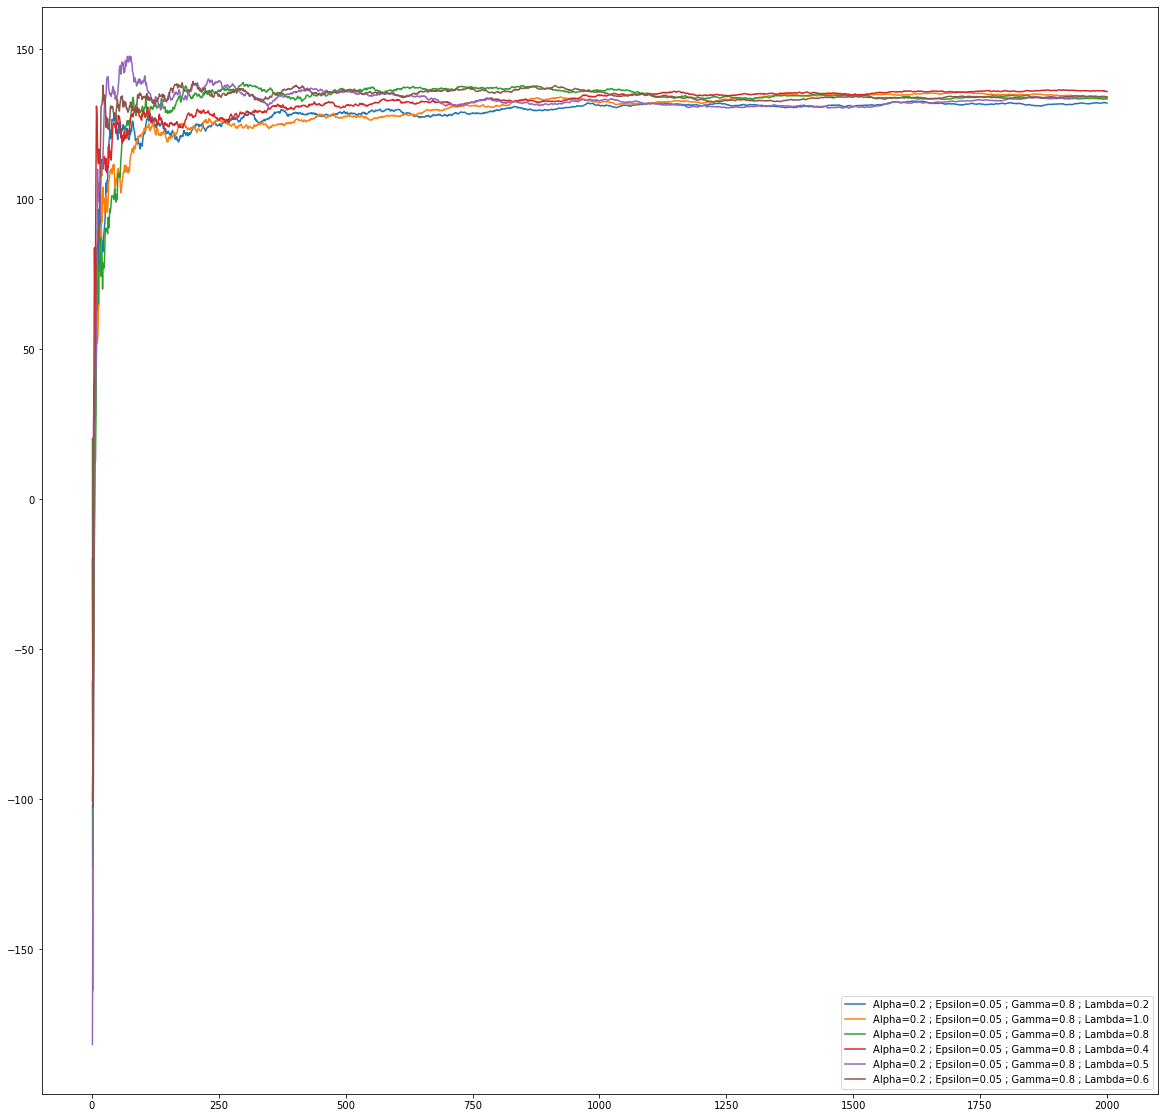

In [3]:
# Code to compare 0.5, 0.4, 0.6 for lambda
# param_combos = [each for each in param_combos if each[3]==0.4 or each[3]==0.5 or each[3]==0.6]

for each in param_combos:
    #print(each[0],each[1],each[2],each[3])
    label= "Alpha=" + str(each[0]) + " ; Epsilon=" + str(each[1]) + " ; Gamma=" + str(each[2]) + " ; Lambda=" + str(each[3])
    
    plot_data = data[(data[:,3] == each[0]) & (data[:,4] == each[1]) & (data[:,5] == each[2]) & (data[:,6] == each[3])][:,[0,1]]
    #print(plot_data)
    
    avg_plot_data = npi.group_by(plot_data[:, 0]).mean(plot_data)[1]
    #print(avg_plot_data[:,1])
    
    x_data = avg_plot_data[:,0]
    y_data = avg_plot_data[:,1]

    plt.plot(x_data, y_data, label=label)
    plt.legend(loc='lower right')